# Capstone Project Analysis

***

## Project Description

If Salifort could predict whether an employee will leave the company, and discover the reasons behind their departure, they could better understand the problem and develop a solution. 

Next, the leadership team asks you to analyze the survey data and come up with ideas for how to increase employee retention. To help with this, they suggest you design a model that predicts whether an employee will leave the company based on their job title, department, number of projects, average monthly hours, and any other relevant data points. A good model will help the company increase retention and job satisfaction for current employees, and save money and time training new employees.

## Data Dictionary

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| satisfaction_level |	The employee’s self-reported satisfaction level [0-1]|
| last_evaluation|	Score of employee's last performance review [0-1]|
| number_project |	Number of projects employee contributes to |
| average_monthly_hours |	Average number of hours employee worked per month |
| time_spend_company | How long the employee has been with the company (years)	|
| work_accident | Whether or not the employee experienced an accident while at work	|
| promotion_last_5years | Whether or not the employee was promoted in the last 5 years	|
| department |	The employee's department |
| salary |	The employee's salary (low, medium, or high) |
| left | Whether or not the employee left the company |

## Data sources used

employee data collected by the Human Resources department of Salifort Motors

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Plotly
# import plotly.express as px
# import plotly.offline as py
# import plotly.graph_objs as go

#import sweetviz

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
# import researchpy as rp

import datetime
from datetime import datetime, timedelta

#import eli5
#from IPython.display import display

#import os
#import zipfile
#import scipy.stats
#from collections import Counter

import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
# from sklearn.linear_model import LinearRegression, LogisticRegression, ElasticNet, Lasso, Ridge
# from sklearn.model_selection import cross_val_score, train_test_split
# from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, f1_score
# from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, LogisticRegression, Ridge
# from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier, ExtraTreeRegressor, plot_tree
# from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR
# from sklearn.naive_bayes import GaussianNB, MultinomialNB

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# Use Feature-Engine library
#import feature_engine
#from feature_engine import imputation as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce
#from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser
#from feature_engine.discretisation import ArbitraryDiscretiser, DecisionTreeDiscretiser
#from feature_engine.encoding import OrdinalEncoder

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("HR_capstone_dataset.csv")

In [3]:
df.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  time_spend_company  work_accident  promotion_last_5years department  salary  left
0                0.38             0.53               2                    157                   3              0                      0      sales     low     1
1                0.80             0.86               5                    262                   6              0                      0      sales  medium     1
2                0.11             0.88               7                    272                   4              0                      0      sales  medium     1
3                0.72             0.87               5                    223                   5              0                      0      sales     low     1
4                0.37             0.52               2                    159                   3              0                      0      sales     low     1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.describe(include="all")

satisfaction_level  last_evaluation  number_project  average_monthly_hours  time_spend_company  work_accident  promotion_last_5years department salary     left
count             14999.00         14999.00        14999.00               14999.00            14999.00       14999.00               14999.00      14999  14999 14999.00
unique                 NaN              NaN             NaN                    NaN                 NaN            NaN                    NaN         10      3      NaN
top                    NaN              NaN             NaN                    NaN                 NaN            NaN                    NaN      sales    low      NaN
freq                   NaN              NaN             NaN                    NaN                 NaN            NaN                    NaN       4140   7316      NaN
mean                  0.61             0.72            3.80                 201.05                3.50           0.14                   0.02        NaN    NaN     0.24
std                   0.25             0.17            1.23                  49.94                1.46           0.35                   0.14        NaN    NaN     0.43
min                   0.09             0.36            2.00                  96.00                2.00           0.00                   0.00        NaN    NaN     0.00
25%                   0.44             0.56            3.00                 156.00                3.00           0.00                   0.00        NaN    NaN     0.00
50%                   0.64             0.72            4.00                 200.00                3.00           0.00                   0.00        NaN    NaN     0.00
75%                   0.82             0.87            5.00                 245.00                4.00           0.00                   0.00        NaN    NaN     0.00
max                   1.00             1.00            7.00                 310.00               10.00           1.00                   1.00        NaN    NaN     1.00

In [6]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'time_spend_company', 'work_accident', 'promotion_last_5years', 'department', 'salary', 'left'], dtype='object')

### Groupby Function

In [7]:
df.groupby("left").mean()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  time_spend_company  work_accident  promotion_last_5years
left                                                                                                                                      
0                   0.67             0.72            3.79                 199.06                3.38           0.18                   0.03
1                   0.44             0.72            3.86                 207.42                3.88           0.05                   0.01

In [8]:
df.groupby("left").median()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  time_spend_company  work_accident  promotion_last_5years
left                                                                                                                                      
0                   0.69             0.71            4.00                 198.00                3.00           0.00                   0.00
1                   0.41             0.79            4.00                 224.00                4.00           0.00                   0.00

## Data Visualization

### Univariate Data Exploration

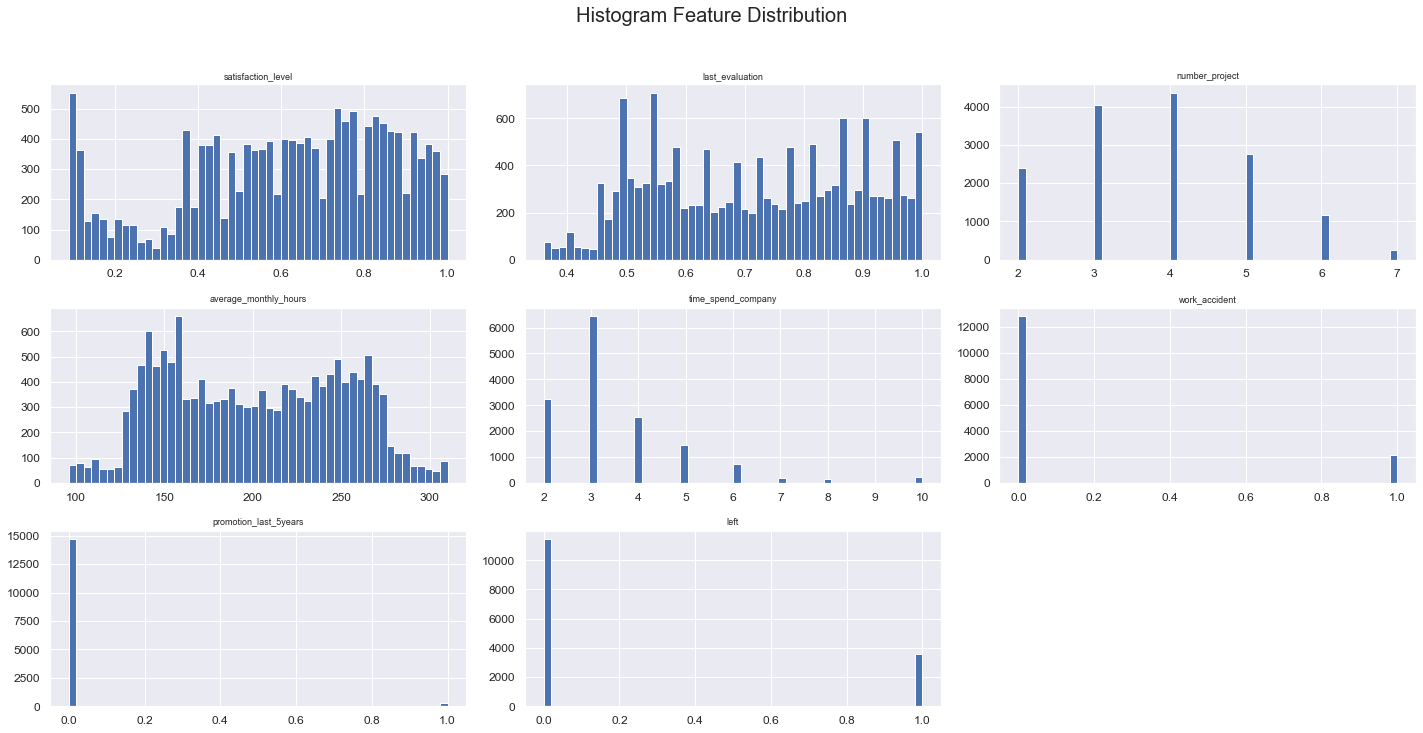

In [9]:
df.hist(bins=50, figsize=(20,10))
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)

plt.tight_layout()
plt.show()

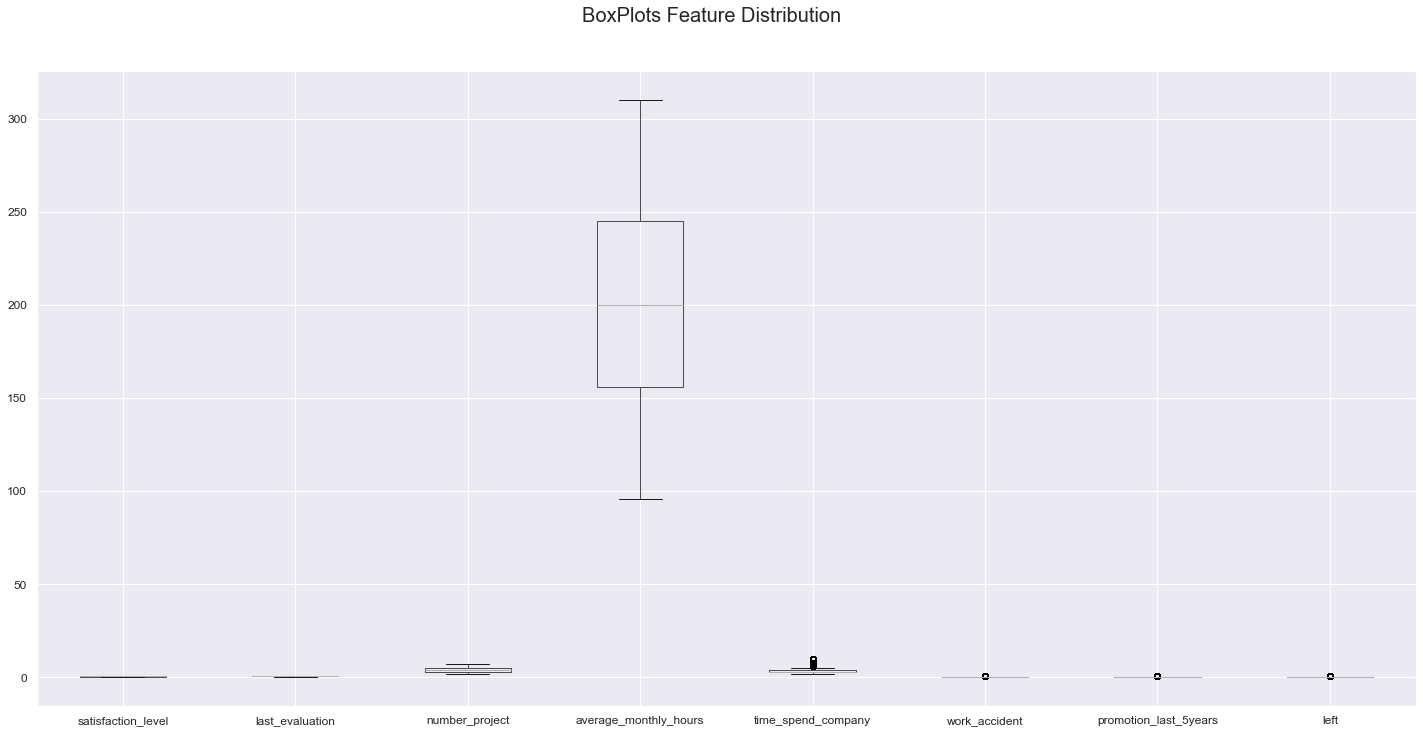

In [10]:
df.boxplot(figsize=(20,10))
plt.suptitle('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)

plt.tight_layout()
plt.show()

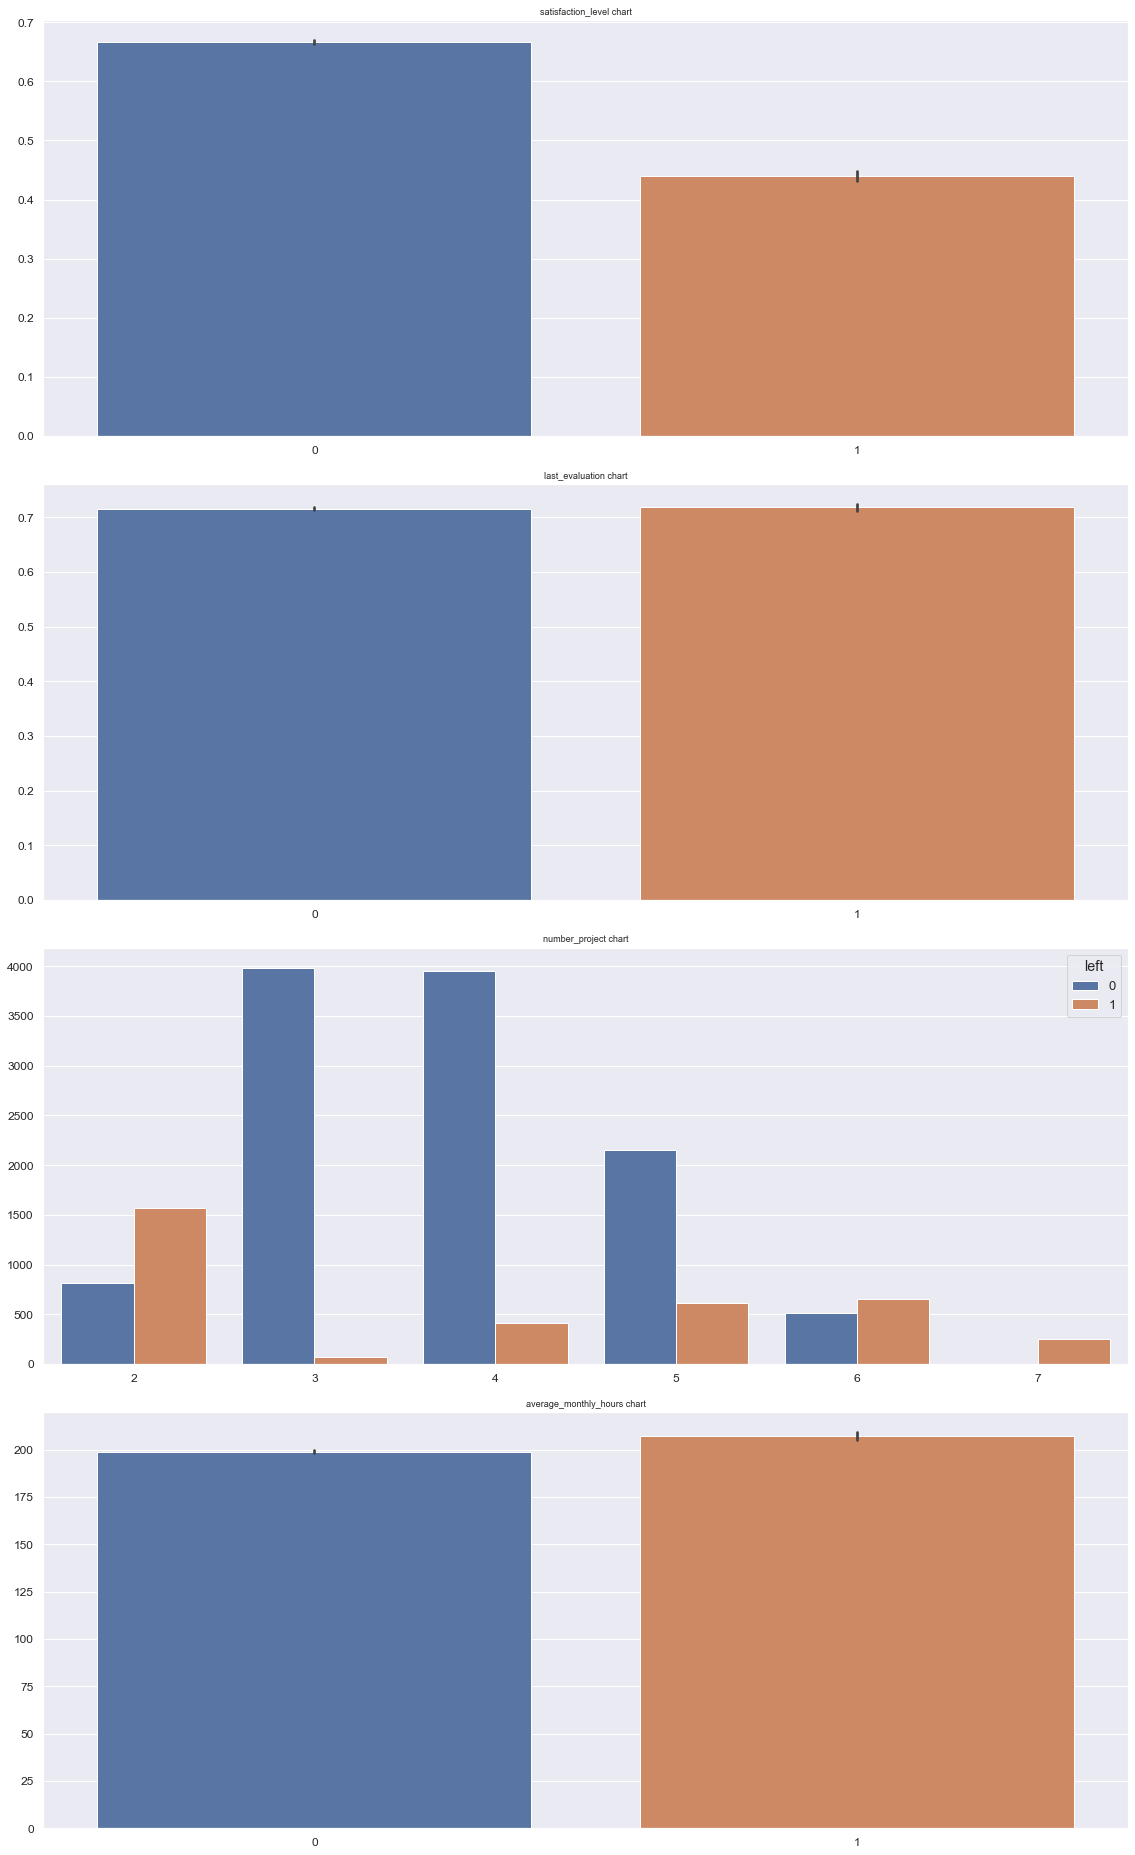

In [12]:
# Plot 4 rows and 1 column (can be expanded)

fig, ax = plt.subplots(4,1, sharex=False, figsize=(16,26))
#fig.suptitle('Main Title')


sns.barplot(x='left', y="satisfaction_level", data=df, ax=ax[0])
ax[0].set_title('satisfaction_level chart')
#ax[0].tick_params('x', labelrotation=45)
ax[0].set_xlabel("")
ax[0].set_ylabel("")

sns.barplot(x="left", y="last_evaluation", data=df, ax=ax[1])
ax[1].set_title('last_evaluation chart')
#ax[1].tick_params('x', labelrotation=45)
ax[1].set_xlabel("")
ax[1].set_ylabel("")

sns.countplot(x="number_project", hue="left", data=df, ax=ax[2])
ax[2].set_title('number_project chart')
#ax[2].tick_params('x', labelrotation=45)
ax[2].set_xlabel("")
ax[2].set_ylabel("")

sns.barplot(x="left", y="average_monthly_hours", data=df, ax=ax[3])
ax[3].set_title('average_monthly_hours chart')
#ax[3].tick_params('x', labelrotation=45)
ax[3].set_xlabel("")
ax[3].set_ylabel("")

plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

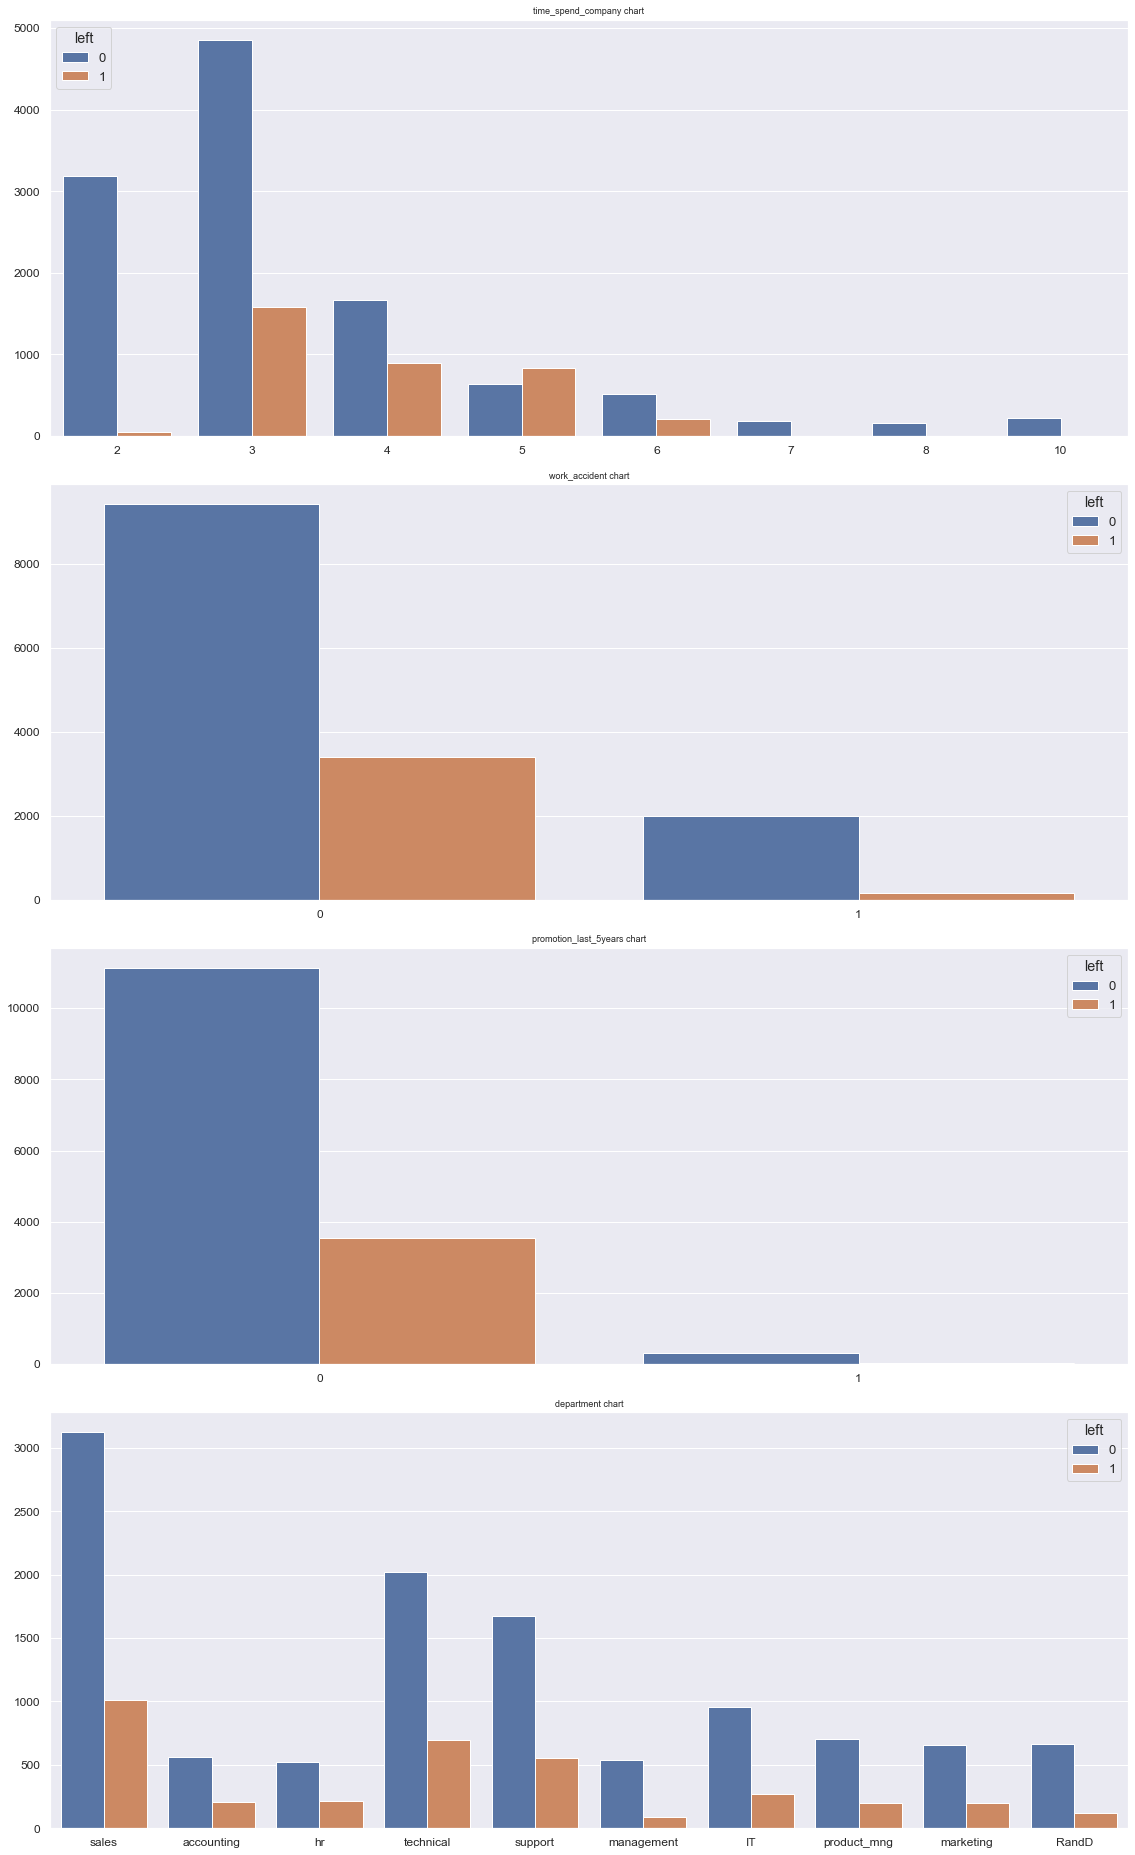

In [13]:
# Plot 4 rows and 1 column (can be expanded)

fig, ax = plt.subplots(4,1, sharex=False, figsize=(16,26))
#fig.suptitle('Main Title')


sns.countplot(hue='left', x="time_spend_company", data=df, ax=ax[0])
ax[0].set_title('time_spend_company chart')
#ax[0].tick_params('x', labelrotation=45)
ax[0].set_xlabel("")
ax[0].set_ylabel("")

sns.countplot(x="work_accident", hue="left", data=df, ax=ax[1])
ax[1].set_title('work_accident chart')
#ax[1].tick_params('x', labelrotation=45)
ax[1].set_xlabel("")
ax[1].set_ylabel("")

sns.countplot(hue="left", x="promotion_last_5years", data=df, ax=ax[2])
ax[2].set_title('promotion_last_5years chart')
#ax[2].tick_params('x', labelrotation=45)
ax[2].set_xlabel("")
ax[2].set_ylabel("")

sns.countplot(hue="left", x="department", data=df, ax=ax[3])
ax[3].set_title('department chart')
#ax[3].tick_params('x', labelrotation=45)
ax[3].set_xlabel("")
ax[3].set_ylabel("")

plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

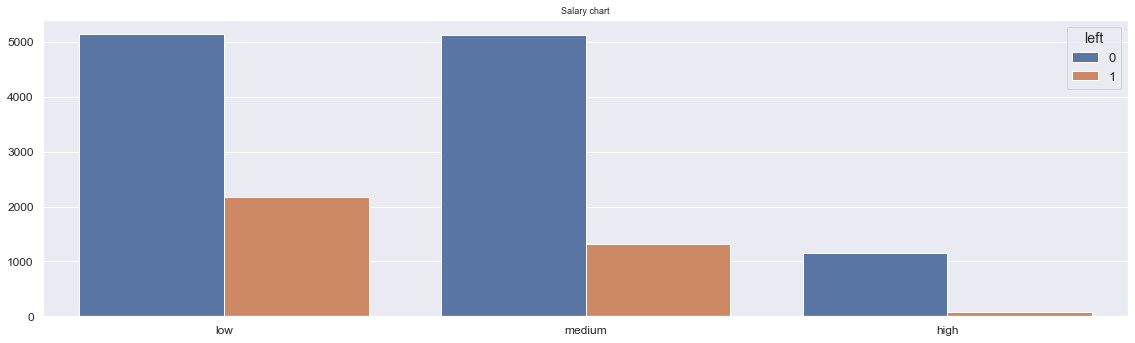

In [14]:
# Plot 1 rows and 2 columns (can be expanded)

fig, ax = plt.subplots(1,1, sharex=False, figsize=(16,5))
#fig.suptitle('Main Title')

sns.countplot(x='salary', data=df, hue="left")
ax.set_title('Salary chart')
#ax.tick_params('x', labelrotation=45)
ax.set_xlabel("")
ax.set_ylabel("")

plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

### Correlation

In [15]:
df.corr()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  time_spend_company  work_accident  promotion_last_5years  left
satisfaction_level                   1.00             0.11           -0.14                  -0.02               -0.10           0.06                   0.03 -0.39
last_evaluation                      0.11             1.00            0.35                   0.34                0.13          -0.01                  -0.01  0.01
number_project                      -0.14             0.35            1.00                   0.42                0.20          -0.00                  -0.01  0.02
average_monthly_hours               -0.02             0.34            0.42                   1.00                0.13          -0.01                  -0.00  0.07
time_spend_company                  -0.10             0.13            0.20                   0.13                1.00           0.00                   0.07  0.14
work_accident                        0.06            -0.01           -0.00                  -0.01                0.00           1.00                   0.04 -0.15
promotion_last_5years                0.03            -0.01           -0.01                  -0.00                0.07           0.04                   1.00 -0.06
left                                -0.39             0.01            0.02                   0.07                0.14          -0.15                  -0.06  1.00

In [16]:
df.corr()["left"].sort_values()

satisfaction_level      -0.39
work_accident           -0.15
promotion_last_5years   -0.06
last_evaluation          0.01
number_project           0.02
average_monthly_hours    0.07
time_spend_company       0.14
left                     1.00
Name: left, dtype: float64

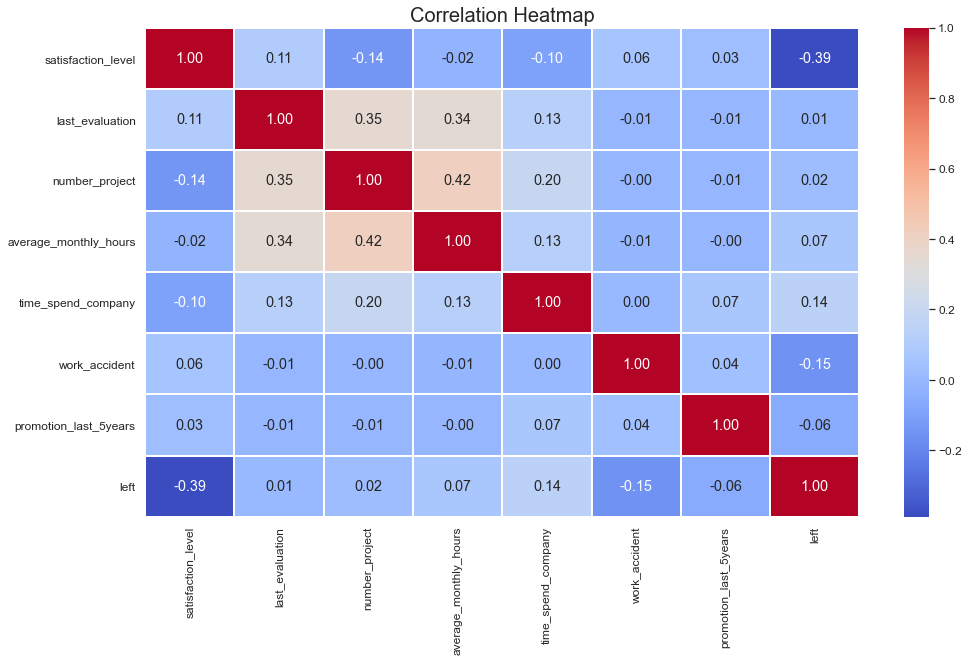

In [17]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.title("Correlation Heatmap", fontsize=20)
plt.show()

## Data Preprocessing

### Feature Engineering

In [18]:
df.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  time_spend_company  work_accident  promotion_last_5years department  salary  left
0                0.38             0.53               2                    157                   3              0                      0      sales     low     1
1                0.80             0.86               5                    262                   6              0                      0      sales  medium     1
2                0.11             0.88               7                    272                   4              0                      0      sales  medium     1
3                0.72             0.87               5                    223                   5              0                      0      sales     low     1
4                0.37             0.52               2                    159                   3              0                      0      sales     low     1

### Treat Missing Values

In [19]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
promotion_last_5years    0
department               0
salary                   0
left                     0
dtype: int64

### Treat Duplicate Values

In [20]:
df.duplicated(keep='first').sum()

3008

In [21]:
df[df.duplicated(keep=False)] #Check duplicate values

satisfaction_level  last_evaluation  number_project  average_monthly_hours  time_spend_company  work_accident  promotion_last_5years department  salary  left
0                    0.38             0.53               2                    157                   3              0                      0      sales     low     1
1                    0.80             0.86               5                    262                   6              0                      0      sales  medium     1
2                    0.11             0.88               7                    272                   4              0                      0      sales  medium     1
3                    0.72             0.87               5                    223                   5              0                      0      sales     low     1
4                    0.37             0.52               2                    159                   3              0                      0      sales     low     1
...                   ...              ...             ...                    ...                 ...            ...                    ...        ...     ...   ...
14994                0.40             0.57               2                    151                   3              0                      0    support     low     1
14995                0.37             0.48               2                    160                   3              0                      0    support     low     1
14996                0.37             0.53               2                    143                   3              0                      0    support     low     1
14997                0.11             0.96               6                    280                   4              0                      0    support     low     1
14998                0.37             0.52               2                    158                   3              0                      0    support     low     1

[5346 rows x 10 columns]

### Type Change

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [23]:
df["work_accident"] = df["work_accident"].astype('object')

In [24]:
df["promotion_last_5years"] = df["promotion_last_5years"].astype('object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   work_accident          14999 non-null  object 
 6   promotion_last_5years  14999 non-null  object 
 7   department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 1.1+ MB


### One-hot encoding

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   work_accident          14999 non-null  object 
 6   promotion_last_5years  14999 non-null  object 
 7   department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 1.1+ MB


In [27]:
df2 = pd.get_dummies(data=df, drop_first=True)

In [28]:
df2.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  time_spend_company  left  work_accident_1  promotion_last_5years_1  department_RandD  department_accounting  department_hr  department_management  department_marketing  department_product_mng  department_sales  department_support  department_technical  salary_low  salary_medium
0                0.38             0.53               2                    157                   3     1                0                        0                 0                      0              0                      0                     0                       0                 1                   0                     0           1              0
1                0.80             0.86               5                    262                   6     1                0                        0                 0                      0              0                      0                     0                       0                 1                   0                     0           0              1
2                0.11             0.88               7                    272                   4     1                0                        0                 0                      0              0                      0                     0                       0                 1                   0                     0           0              1
3                0.72             0.87               5                    223                   5     1                0                        0                 0                      0              0                      0                     0                       0                 1                   0                     0           1              0
4                0.37             0.52               2                    159                   3     1                0                        0                 0                      0              0                      0                     0                       0                 1                   0                     0           1              0

In [29]:
list(df2.columns.values)

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_monthly_hours',
 'time_spend_company',
 'left',
 'work_accident_1',
 'promotion_last_5years_1',
 'department_RandD',
 'department_accounting',
 'department_hr',
 'department_management',
 'department_marketing',
 'department_product_mng',
 'department_sales',
 'department_support',
 'department_technical',
 'salary_low',
 'salary_medium']

In [30]:
df2 = df2[['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_monthly_hours',
 'time_spend_company',
 'work_accident_1',
 'promotion_last_5years_1',
 'department_RandD',
 'department_accounting',
 'department_hr',
 'department_management',
 'department_marketing',
 'department_product_mng',
 'department_sales',
 'department_support',
 'department_technical',
 'salary_low',
 'salary_medium',
 'left']]

In [31]:
df2.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  time_spend_company  work_accident_1  promotion_last_5years_1  department_RandD  department_accounting  department_hr  department_management  department_marketing  department_product_mng  department_sales  department_support  department_technical  salary_low  salary_medium  left
0                0.38             0.53               2                    157                   3                0                        0                 0                      0              0                      0                     0                       0                 1                   0                     0           1              0     1
1                0.80             0.86               5                    262                   6                0                        0                 0                      0              0                      0                     0                       0                 1                   0                     0           0              1     1
2                0.11             0.88               7                    272                   4                0                        0                 0                      0              0                      0                     0                       0                 1                   0                     0           0              1     1
3                0.72             0.87               5                    223                   5                0                        0                 0                      0              0                      0                     0                       0                 1                   0                     0           1              0     1
4                0.37             0.52               2                    159                   3                0                        0                 0                      0              0                      0                     0                       0                 1                   0                     0           1              0     1

### Save to CSV

In [32]:
#df2.to_csv("HR.csv", index=False)

### Create Train, Validation and Test Dataset

In [ ]:
df2.shape

In [ ]:
trainset = df2[0:14000]

In [ ]:
trainset

In [ ]:
testset = df2[14000:]

In [ ]:
testset

In [ ]:
trainset.to_csv("train.csv", index=False)

In [ ]:
testset.to_csv("test.csv", index=False)

In [ ]:
testset.drop(['left'], axis=1, inplace=True)

In [ ]:
testset.head()

In [ ]:
testset.to_csv("test2.csv", index=False)

## Regression Analysis

## Logistic Regression (StatsModel)

In [33]:
df2.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'time_spend_company', 'work_accident_1', 'promotion_last_5years_1', 'department_RandD', 'department_accounting', 'department_hr', 'department_management', 'department_marketing', 'department_product_mng', 'department_sales', 'department_support', 'department_technical', 'salary_low', 'salary_medium', 'left'], dtype='object')

In [34]:
y = df2[['left']]
X = df2[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'time_spend_company', 
       'work_accident_1', 'promotion_last_5years_1', 'department_RandD', 'department_accounting', 'department_hr', 
       'department_management', 'department_marketing', 'department_product_mng', 'department_sales', 
       'department_support', 'department_technical', 'salary_low', 'salary_medium']]

In [35]:
X = sm.add_constant(X)

In [36]:
model = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.428358
         Iterations 7


In [37]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   left   No. Observations:                14999
Model:                          Logit   Df Residuals:                    14980
Method:                           MLE   Df Model:                           18
Date:                Tue, 11 Apr 2023   Pseudo R-squ.:                  0.2195
Time:                        19:54:25   Log-Likelihood:                -6424.9
converged:                       True   LL-Null:                       -8232.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.6570      0.189     -8.784      0.000      -2.027      -1.287
satisfaction_level         -4.1357      0.098    -42.177      0.000      -4.328      -3.944
last_evaluation             0.7309      0.149      4.899      0.000       0.439       1.023
number_project             -0.3151      0.021    -14.775      0.000      -0.357      -0.273
average_monthly_hours       0.0045      0.001      8.643      0.000       0.003       0.005
time_spend_company          0.2678      0.016     17.192      0.000       0.237       0.298
work_accident_1            -1.5298      0.090    -17.083      0.000      -1.705      -1.354
promotion_last_5years_1    -1.4301      0.258     -5.552      0.000      -1.935      -0.925
department_RandD           -0.4016      0.136     -2.962      0.003      -0.667      -0.136
department_accounting       0.1807      0.122      1.480      0.139      -0.059       0.420
department_hr               0.4131      0.121      3.415      0.001       0.176       0.650
department_management      -0.2677      0.152     -1.765      0.078      -0.565       0.030
department_marketing        0.1686      0.122      1.386      0.166      -0.070       0.407
department_product_mng      0.0275      0.120      0.230      0.818      -0.207       0.262
department_sales            0.1419      0.089      1.601      0.109      -0.032       0.316
department_support          0.2307      0.097      2.391      0.017       0.042       0.420
department_technical        0.2509      0.093      2.685      0.007       0.068       0.434
salary_low                  1.9441      0.129     15.111      0.000       1.692       2.196
salary_medium               1.4132      0.129     10.924      0.000       1.160       1.667
===========================================================================================
"""

#### Python code done by Dennis Lam